<h1 style="text-align: center;">Neural Networks</h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

## Introducción
La idea central es extraer combinaciones lineales de las entradas como **features derivadas**, y luego modelizar el target como una función no lineal de esas features.
<div style="text-align:center;">
    <img src="Imagenes_Neural_Network/NN Training summary.png">
</div>

*Deep learning* está inspirado en las funciones del cerebro, tal y como está interconectadas las neuronas en el cerebro, las redes neuronales funcionan de una manera parecida. 

### Definiciones iniciales:
* Neuron/Nodo: Elemento que alamcena un número. Generalmente un valor entre 0 y 1
* Layer/Capa: Es un conjunto de neuronas que aplican una operación matemática específica (como una transformación lineal seguida de una función de activación) sobre su entrada, y cuyo resultado se transmite a la siguiente capa.
    * Input Layer/ Capa de Entrada: Son los datos de las variables independientes
    * Hidden Layer / Capas Ocultas: Son las capas intermedias donde se realizan los cálculos para entender el modelo.
        * La **profundidad** indica el número de capas ocultas que tiene el modelo.
        * Los cálculos se realizan con:
            * Los **weights/pesos**: $\alpha$
            * Los **bias/sesgos**: $\alpha_0$
            * La **función de activación**: $\sigma$
            * ***p***: número de componentes de *X*, su rango es 1,..., p
            * ***K***: número de valores de salida, su rango es -> k= 1,...,K
            * ***M***: número de nodos en una capa, su rango es -> m= 1,...,M

## Projection Pursuit Regression
Como todos los problemas de aprendizaje supervisado, tenemos un vector de entrada X con *p* variables independientes y un target *y*. Usaremos unos pesos $\omega_m$ siendo $m=1,2,...,p$. El *Prjection Pursuit Regression* PPR tendrá la forma:
$$
f(X)=\sum_{m=1}^{p}g_m(\omega_{m}^TX)
$$
Donde muchas veces para simplificar usaremos:
$$
V_m = \omega_{m}^TX
$$

La función $g_m(\omega_{m}^TX)$ es llamada la *ridge function* in el espacio $\mathbb{R}^p$



# Neural Network
Actualmente el nombre de red neural ha derivado en una gran cantidad de modelos y metodos de aprendizaje. Por ahora vamos a describir el modelo mas sencillo y basico (el modelo mas "vanilla") llamado tambien como el Perceptron de una capa oculta o the single layer back-propagation network. Usualmente son vistos como una especie de magia que proviene de los ordenadores, pero realmente se puede ver como modelos estadíticos no lineales.

Son usados para problemas de clasificación y de regresión, en el caso de tener un problema de regresión nuestra capa fianl estará compuesta por un único nodo que nos indicará el resultado, en cambio si es un problema de clasificación con *k* posibles valores nuestra capa final estará compuesta por *k* nodos, donde cada uno tendrá su posibilidad de ser.

Empezaremos con los nodos de nuestras variables independientes: $X^n$, todos estos nodos de inicio pasarán sus valores a cada uno de los nodos de la siguiente capa de nuestra red, dentro de cada nodo interno se calculará el valor de estos nodos internos como una función lineal de la capa anterior, nosotros lo llamaremos $Z_m$ donde *m* será el número de nodos de la capa
$$
\begin{align*}
Z_m &= \sigma(\alpha_{0m}+ \alpha_{m}^{T}X) && Z_m: \text{Variable derivada} \\
&                                          && \sigma: \text{Función de activación} \\
&                                          && \alpha_{0m}: \text{bias} \\
&                                          && \alpha_{m}^{T}: \text{Peso para el nodo m de la capa T} \\
\end{align*}
$$
* La **función de activación $\sigma(v)$** será aquella que usaremos para hacer que los valores de cada nodo varien entre 0 y 1.
* Realmente cada nodo asocia a los nodos anteriores un *bias*, pero como al final es una función lineal de la capa anterior, podemos juntar los *bias* como un único valor.



Las unidades en la parte central de la red son llamadas *hidden unitis*, porque los valores de $Z_m$ no son observados directamente. Podemos imaginar los valores de $Z_m$ como una *expansión de las bases* de las entradas originales X; la **red neuronal** es entonces un modelo lineal estándard, o un modelo multilogistico lineal (usando estas transformaciones como entradas). Pero hay una mejora: en este caso los parametros de la función base son <u> aprendidos desde los datos</u>.
Es por ello que, si la función de activación $\sigma$ fuese la *función identidad*, entonces el modelo complpeto colapsaría en un modelo lineal.

De tal forma, una red neuronal se puede describir como una generalización **no-lineal** de un modelo lineal mediante la introducción de la función de activación $\alpha$

## Fitting Neural Networks
Las redes neuronales en un principio tienen parametros desconocidos: los **weights(pesos)**, es nuestro trabajo encontrar valores para estos pesos, y conseguir que el modelo encaje bien con los datos de entrenamiento.
Tendremos nuestro set completo de pesos de la siguiente manera:
$$
\begin{align*}
{\alpha_{0m}, \alpha_m; m=1,2,\dots, M}&\quad M(p+1) weights \\
{\beta_{0k}, \beta_k; k=1,2,\dots,K} &\quad K(M+1) weights\\
\end{align*}
$$

* Para regresión, usaremos el SSE *sum-of-squared errors* como nuestra medida de encaje (**función de error**)
$$
R(\theta)=\sum_{k=1}^K\sum_{i=1}^N(y_{ik}-f_k(x_i))^2
$$

* Para clasificación podemos usar *squared error* o *cross-entropy* como **función de error**:
$$
R(\theta)=\sum_{k=1}^K\sum_{i=1}^Ny_{ik}\text{log}f_k(x_i)
$$

De forma general no queremos el **minimo global de $R(\theta)$**, ya que es muy probable que nos de una solución <u>sobreajustada</u>. Para que no se dé el sobreajuste podremos hacerlo de varias formas:
* De manera directa: Con un **término de penalización**
* De manera indirecta: Con un **early stopping**



# Algunos problemas entrenando Redes Neuronales.
Entrenar una red neuronal es casi un arte. Los modelos generalmente están sobreparametrizados, y el problema de la optimización es *no-convexo* e *inestable*, por ello algunas reglas deben aplicarse. Son las siguientes reglas:

## Valores iniciales.
Supongamos que iniciamos los pesos (y todos los parametros del modelo) con un valor igual a 0. Debido a como se realiza el **gradient descent**, muchas veces podemos toparnos con zonas concavas que dan a un mínimo local, el cuál puede estar lejos de la solución. Al ser un mínimo, es gradient descent no nos da ninguna dirección de adonde seguir, quedandonos estancados en una cuenca con un mínimo local.
La mejor forma es realizar varios cálculos del modelo, donde los <u> valores inicales de los parametros del modelo son elegidos aleatoriamente</u>
Uno deberá probar con unos cuantos *puntos iniciales aleatorios*, y elegir aquel que dé la solución menos penalizada. Aunque una solción mas acertada es elegir <u>la media de las predicciones</u> de cada punto inicial. La solución anterior es mejor que hacer la media de los pesos, ya que la *no-lienealidad* del modelo implica que este procedimiento pueda ser pobre.


## Overfitting (sobreajuste)
Usualemente las redes neuronales tienen demasiados pesos lo que provoca que el modelo se *sobreajuste* al mínimo global de $R$.

## Escalado de las entradas
Tal y como pasa en los modelos linales, es necesario aplicar un escalado a las variables para que aquellas de mayor magnitud no opaquen aquellas de menor magnitud. Al principio, es mejor estandarizar todas las entradas para que tengan media=0 y std desviation=1.
Además de estadarizar las magnitudes, también nos permite elegir entre un rango uniforme de pesos aleatorios de entrada [-0.7, +0.7]


## Número de nodos y capas escondidas (hidden units and layers)
Generalmente hablando, es mejor tener **muchos nodos escondidos** que **muy pocos nodos escondidos**.
* Con <u>muy pocos nodos</u> el modelo tal vez no tenga la suficiente elasticidad para capturar las *no-linealidades*
* Con <u>muchos nodos</u> los *nodos extra* tendrán valor casi **nulo** si la regularización es buena.
Para elegir las capas internas se necesita un conocimiento del dataset y experimentación. Cada capa extrae caracteristicas de las entradas

## Funciones de activación. 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")

In [14]:
def draw_act_func(f):
    x = np.linspace(-10, 10, 1000)
    y = f(x)

    plt.figure(figsize=(3,3))
    plt.plot(x, y)
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()


### Función de activación lineal. 
Una neurona lineal coge una combinación lineal de las entradas multiplicadas por sus pesos. 
Las *funciones de activación lineal* son aquellas donde es una función continua y derivable.
#### "linear"
La función simplemente devuelve los valores de entrada. 
$$
linear(x) = x
$$
* Este tipo de neurona de activación no son recomendable usarlas en las capas ocultas de la red, puesto que esto "no es una función de activación". Realmente al usar esto en las capas ocultas, nuestro modelo podría colapsar en una **regresión**
* Solo es útil para las **capas de salida** para problemas de regresión.

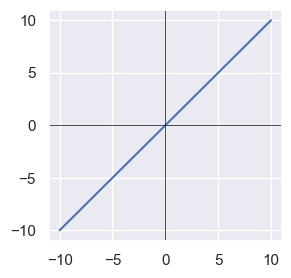

In [15]:
from tensorflow.keras.activations import linear

draw_act_func(linear)

### Funciones de activación no-lineales.
#### "relu"
La **Rectified Lineral Unit** fucnión de activación que cualquier valor inferior a 0 lo convierte en 0.
$$
\text{ReLU}(x)=max(0, x) 
$$
$$
\mathrm{ReLU}(x) =
\begin{cases}
x & \text{si } x > 0 \\
0 & \text{si } x \leq 0
\end{cases}
$$
Aunque pueda parecer que es lineal, incumple la regla que debe ser derivable en todo el intervalo.


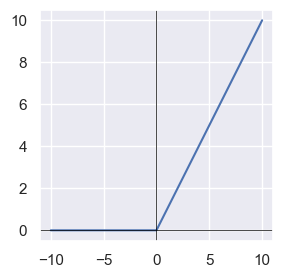

In [16]:
from tensorflow.keras.activations import relu

draw_act_func(relu)

#### "sigmoid" o logit
Aplica la función logaritmíca, escalando entre [0, 1]. Se llama **sigmoid** porque hace una *S* 
$$ 
\sigma(x)=\frac{1}{1+e^{-x}}
$$

* Se suele usar para **capas de salida en clasificación binaria**.
* A veces en capas ocultas (aunque hoy se prefuere `relu`)

Desventajas:
* El **gradiente se aplana** -> en los extremos la derivada se acerca a 0, aprendizaje lento. 
* Salida no centrada en 0, está centrada en 0.5


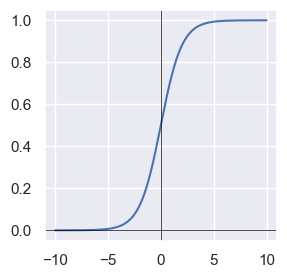

In [17]:
from tensorflow.keras.activations import sigmoid

draw_act_func(sigmoid)

* Para valores grandes negativos $\sigma{x} \aprox 0$$
* Para valores grandes positivos $\sigma{x} \aprox 1$$
* En x=0 : $\sigma(0)=0.5$